In [4]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [16]:
df = pd.read_csv("../dataset/covid19vaccinesbycounty.csv",usecols=[0,1,13])

In [17]:
df.tail()

,county,administered_date,cumulative_fully_vaccinated
8005,Yuba,2021-04-23,13675
8006,Yuba,2021-04-24,13753
8007,Yuba,2021-04-25,13780
8008,Yuba,2021-04-26,13875
8009,Yuba,2021-04-27,13977


In [9]:
df.describe()

,cumulative_fully_vaccinated
count,8.010000e+03
mean,1.780937e+05
std,9.421768e+05
min,0.000000e+00
25%,5.770000e+02
50%,6.355500e+03
75%,4.457450e+04
max,1.196178e+07


In [18]:
df['administered_date'] = pd.DatetimeIndex(df['administered_date'])
df.dtypes

county                                 object
administered_date              datetime64[ns]
cumulative_fully_vaccinated             int64
dtype: object

In [21]:
#Getting the county wise data
import datetime
df = df.loc[(df["county"] == "Santa Clara")]
del df['county']
df.head(7)

,administered_date,cumulative_fully_vaccinated
5949,2020-12-15,0
5950,2020-12-16,0
5951,2020-12-17,0
5952,2020-12-18,0
5953,2020-12-19,0
5954,2020-12-20,0
5955,2020-12-21,0


In [23]:
#preprocessing
df = df.iloc[::-1]
df.head()

,administered_date,cumulative_fully_vaccinated
6082,2021-04-27,627843
6081,2021-04-26,622321
6080,2021-04-25,615467
6079,2021-04-24,611860
6078,2021-04-23,605686


In [29]:
#setting the date time index on date column
df['ds'] = pd.DatetimeIndex(df['administered_date'])
df.drop('administered_date', axis=1, inplace=True)
df_train = df[0:]

KeyError: 'administered_date'

In [31]:
#renaming the columns as required by the prophet
df_train.columns = ['y','ds']
df_train.tail()

,y,ds
5953,0,2020-12-19
5952,0,2020-12-18
5951,0,2020-12-17
5950,0,2020-12-16
5949,0,2020-12-15


In [42]:
m = Prophet(interval_width=0.95)
model = m.fit(df_train)
future = m.make_future_dataframe(periods=180,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,-160.017301,-5624.315861,3226.664543,-160.017301,-160.017301,-1255.241331,-1255.241331,-1255.241331,-1255.241331,-1255.241331,-1255.241331,0.0,0.0,0.0,-1415.258632
1,2020-12-16,-165.633029,-5138.255645,4427.722995,-165.633029,-165.633029,-226.767174,-226.767174,-226.767174,-226.767174,-226.767174,-226.767174,0.0,0.0,0.0,-392.400203
2,2020-12-17,-171.248758,-3480.193630,5878.175771,-171.248758,-171.248758,1128.742573,1128.742573,1128.742573,1128.742573,1128.742573,1128.742573,0.0,0.0,0.0,957.493815
3,2020-12-18,-176.864486,-2290.423490,6980.966392,-176.864486,-176.864486,2427.798125,2427.798125,2427.798125,2427.798125,2427.798125,2427.798125,0.0,0.0,0.0,2250.933639
4,2020-12-19,-182.480214,-3499.817688,5667.855850,-182.480214,-182.480214,1095.670799,1095.670799,1095.670799,1095.670799,1095.670799,1095.670799,0.0,0.0,0.0,913.190585


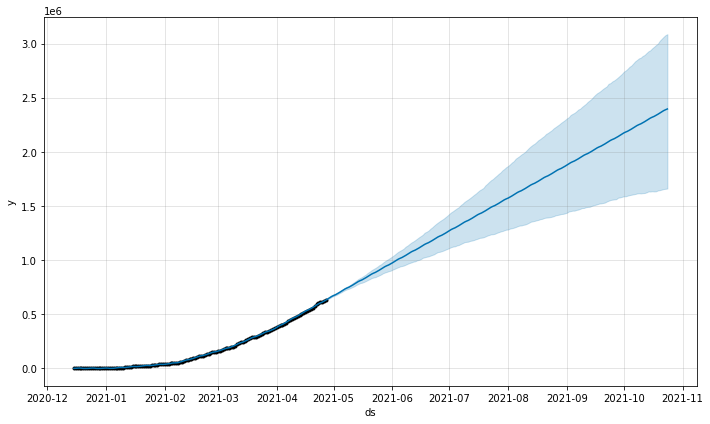

In [43]:
plot1 = m.plot(forecast)

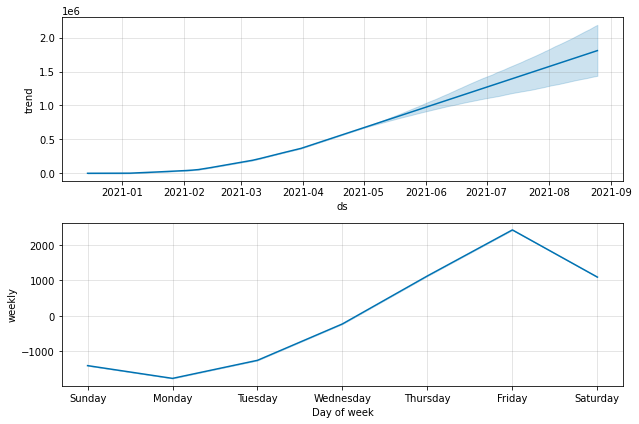

In [38]:
plt2 = m.plot_components(forecast)

In [39]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-12-15,-1.415259e+03
1,2020-12-16,-3.924002e+02
2,2020-12-17,9.574938e+02
3,2020-12-18,2.250934e+03
4,2020-12-19,9.131906e+02
...,...,...
249,2021-08-21,1.770422e+06
250,2021-08-22,1.777724e+06
251,2021-08-23,1.787168e+06
252,2021-08-24,1.797481e+06
